# Captone Project 

# Title : Loan Default Prediction for XYZ Corporation

## Problem Description 

Based on the data that is available during loan applications, XYZ Corporation planned to take insights of the data and to build a model in order to predict the "defaulters" in the future.This will help an Organization whether to sanction a loan or not.

The data contains the indicator of default, payment information, credit history, whereas the active customers during the period(2007 - 2015) shall be considered as non-defaulters.

## Objective and Scope 

XYZ Corporation provided data for the period (2007 - 2015), the scope is to build models on the training data and evaluate its performance on the testing data so as to help reduce the risk of the corporation by predicting the customers who can default the sanctioned loan and increasing the profits by improving loan accessibility to the customers.

## Importing Libraries

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
pd.set_option('display.max_columns' , None)
pd.set_option('display.max_rows' , None)
pd.set_option('display.width' , None)

### Importing  Dataset

In [3]:
%%time
df=pd.read_table(r'D:\CapstoneProject\Capstone Projects\Python\XYZCorp_LendingData.txt',low_memory=False)

Wall time: 15.2 s


In [4]:
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,pymnt_plan,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,default_ind
0,1077501,1296599,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-2011,n,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-1985,1.0,NaN,NaN,3.0,0.0,13648.0,83.7,9.0,f,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,Jan-2015,171.62,NaN,Jan-2016,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,1077430,1314167,2500.0,2500.0,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-2011,n,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0.0,Apr-1999,5.0,NaN,NaN,3.0,0.0,1687.0,9.4,4.0,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-2013,119.66,NaN,Sep-2013,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
2,1077175,1313524,2400.0,2400.0,2400.0,36 months,15.96,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-2011,n,NaN,small_business,real estate business,606xx,IL,8.72,0.0,Nov-2001,2.0,NaN,NaN,2.0,0.0,2956.0,98.5,10.0,f,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,Jun-2014,649.91,NaN,Jan-2016,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
3,1076863,1277178,10000.0,10000.0,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-2011,n,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0.0,Feb-1996,1.0,35.0,NaN,10.0,0.0,5598.0,21.0,37.0,f,0.0,0.0,12226.302212,12226.30,10000.00,2209.33,16.97,0.00,0.00,Jan-2015,357.48,NaN,Jan-2015,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
4,1075358,1311748,3000.0,3000.0,3000.0,60 months,12.69,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-2011,n,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.94,0.0,Jan-1996,0.0,38.0,NaN,15.0,0.0,27783.0,53.9,38.0,f,766.9,766.9,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.00,Jan-2016,67.79,Feb-2016,Jan-2016,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


In [5]:
df.shape

(855969, 73)

In [6]:
df.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,annual_inc_joint,dti_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,default_ind
count,8.559690e+05,8.559690e+05,855969.000000,855969.000000,855969.000000,855969.000000,855969.000000,8.559690e+05,855969.000000,855969.000000,855969.000000,416157.000000,131184.000000,855969.000000,855969.000000,8.559690e+05,855523.000000,855969.000000,855969.000000,855969.000000,855969.000000,855969.00000,855969.000000,855969.000000,855969.000000,855969.000000,855969.000000,855969.000000,855913.000000,213139.000000,855969.0,442.000000,440.000000,855969.000000,7.886560e+05,7.886560e+05,13288.000000,13288.000000,13288.000000,13288.000000,12934.000000,13288.000000,11609.000000,13288.000000,13288.000000,13288.000000,13288.000000,7.886560e+05,13288.000000,13288.000000,13288.000000,855969.000000
mean,3.224073e+07,3.476269e+07,14745.571335,14732.378305,14700.061226,13.192320,436.238072,7.507119e+04,18.122165,0.311621,0.680915,34.149943,70.463959,11.542447,0.194537,1.691053e+04,55.019405,25.269269,8284.830230,8281.449347,7653.296336,7622.22052,5850.841088,1755.046221,0.319530,47.089499,4.951227,2225.985295,0.014230,44.101450,1.0,107412.163982,18.318477,0.004944,2.254129e+02,1.397662e+05,1.072998,2.945665,0.749323,1.666767,20.833153,36511.541391,71.486993,1.354305,2.945515,5840.443332,61.024526,3.216357e+04,0.947772,1.524232,1.841963,0.054286
std,2.271969e+07,2.399418e+07,8425.340005,8419.471653,8425.805478,4.368365,243.726876,6.426447e+04,17.423629,0.857189,0.964033,21.868500,27.827120,5.308094,0.581585,2.222374e+04,23.811585,11.818841,8461.946669,8458.496422,7909.383591,7885.15640,6676.410888,2081.692980,3.609399,413.136043,62.478569,4864.966593,0.133712,22.164907,0.0,47987.608637,7.221855,0.077333,1.048945e+04,1.539385e+05,1.206939,3.080330,0.986169,1.685394,26.739237,42492.757796,23.015293,1.483710,2.595313,5108.500262,20.018117,3.769964e+04,1.441667,2.697601,2.975049,0.226581
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,5.320000,15.690000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,2.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,17950.000000,3.050000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,-4.000000,0.000000
25%,9.067986e+06,1.079273e+07,8000.000000,8000.000000,8000.000000,9.990000,260.550000,4.500000e+04,11.880000,0.000000,0.000000,15.000000,51.000000,8.000000,0.000000,6.469000e+03,37.600000,17.000000,0.000000,0.000000,1969.690000,1960.12000,1239.950000,451.270000,0.000000,0.000000,0.000000,285.420000,0.000000,27.000000,1.0,75000.250000,13.187500,0.000000,0.000000e+00,2.987000e+04,0.000000,1.000000,0.000000,0.000000,6.000000,10390.250000,58.500000,0.000000,1.000000,2405.000000,47.900000,1.400000e+04,0.000000,0.000000,0.000000,0.000000
50%,3.431355e+07,3.697532e+07,13000.000000,13000.000000,13000.000000,12.990000,382.550000,6.500000e+04,17.610000,0.000000,0.000000,31.000000,70.000000,11.000000,0.000000,1.190300e+04,55.900000,24.000000,6290.250000,6287.650000,4976.160000,4948.25000,3286.890000,1076.910000,0.000000,0.000000,0.000000,468.820000,0.000000,44.000000,1.0,100000.000000,17.735000,0.000000,0.000000e+00,8.100850e+04,1.000000,2.000000,0.000000,1.000000,12.000000,24959.500000,75.000000,1.0

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 855969 entries, 0 to 855968
Data columns (total 73 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           855969 non-null  int64  
 1   member_id                    855969 non-null  int64  
 2   loan_amnt                    855969 non-null  float64
 3   funded_amnt                  855969 non-null  float64
 4   funded_amnt_inv              855969 non-null  float64
 5   term                         855969 non-null  object 
 6   int_rate                     855969 non-null  float64
 7   installment                  855969 non-null  float64
 8   grade                        855969 non-null  object 
 9   sub_grade                    855969 non-null  object 
 10  emp_title                    806526 non-null  object 
 11  emp_length                   812908 non-null  object 
 12  home_ownership               855969 non-null  object 
 13 

In [8]:
df.dtypes

id                               int64
member_id                        int64
loan_amnt                      float64
funded_amnt                    float64
funded_amnt_inv                float64
term                            object
int_rate                       float64
installment                    float64
grade                           object
sub_grade                       object
emp_title                       object
emp_length                      object
home_ownership                  object
annual_inc                     float64
verification_status             object
issue_d                         object
pymnt_plan                      object
desc                            object
purpose                         object
title                           object
zip_code                        object
addr_state                      object
dti                            float64
delinq_2yrs                    float64
earliest_cr_line                object
inq_last_6mths           

In [9]:
df.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'pymnt_plan', 'desc', 'purpose', 'title', 'zip_code',
       'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d',
       'collections_12_mths_ex_med', 'mths_since_last_major_derog',
       'policy_code', 'application_type', 'annual_inc_joint', 'dti_joint',
       'verification_status_joint', 'acc_now_delinq', 'tot_col

## Exploratory Data Analysis

### Data Cleaning

In [10]:
# Checking the missing values present in the data
df.isnull().sum()

id                                  0
member_id                           0
loan_amnt                           0
funded_amnt                         0
funded_amnt_inv                     0
term                                0
int_rate                            0
installment                         0
grade                               0
sub_grade                           0
emp_title                       49443
emp_length                      43061
home_ownership                      0
annual_inc                          0
verification_status                 0
issue_d                             0
pymnt_plan                          0
desc                           734157
purpose                             0
title                              33
zip_code                            0
addr_state                          0
dti                                 0
delinq_2yrs                         0
earliest_cr_line                    0
inq_last_6mths                      0
mths_since_l

#### Visualizing the missing values

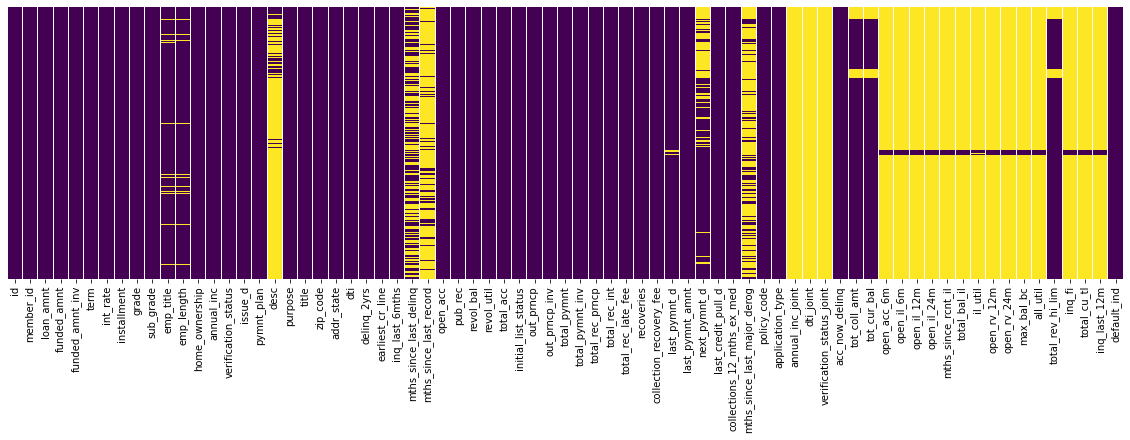

In [11]:
plt.figure(figsize = (20, 5))
sns.heatmap(df.isnull(), cbar = False, yticklabels = False, cmap = "viridis")

In [11]:
#percentage of missing values in each variable

data_missing = df.isnull().sum().sort_values(ascending=False)

percent_missing = (df.isnull().sum()/df.isnull().count()  * 100).sort_values(ascending=False)
missing_data = pd.concat([data_missing,percent_missing],axis = 1,keys = ['Data','% Missing'])
missing_data.head(40)

,Data,% Missing
dti_joint,855529,99.948596
verification_status_joint,855527,99.948363
annual_inc_joint,855527,99.948363
il_util,844360,98.643759
mths_since_rcnt_il,843035,98.488964
total_bal_il,842681,98.447607
inq_last_12m,842681,98.447607
open_acc_6m,842681,98.447607
open_il_6m,842681,98.447607
open_il_24m,842681,98.447607


### Handling the missing values

#### Dropping the variables with missing values more than 50% ,there are 21 such variables

In [12]:
for i in df.columns:
    if missing_data.loc[i, '% Missing'] >= 50:
        df = df.drop(i, axis = 1)

In [13]:
df.shape

(855969, 52)

In [14]:
df.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'pymnt_plan', 'purpose', 'title', 'zip_code', 'addr_state',
       'dti', 'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d',
       'collections_12_mths_ex_med', 'policy_code', 'application_type',
       'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim',
       'default_ind'],
      dtype='object')

#### Dropping the irrelevant variables

* id, member_id
* title
* zip_code 
* total_rec_late_fee 
* next_pymnt_d 
* policy_code 

In [15]:
df1 = df.drop(['id', 'member_id', 'title', 'zip_code', 'total_rec_late_fee', 'next_pymnt_d', 'policy_code'], axis = 1)

In [16]:
df1.shape

(855969, 45)

In [17]:
df1.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status', 'issue_d',
       'pymnt_plan', 'purpose', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'inq_last_6mths', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'initial_list_status',
       'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_prncp', 'total_rec_int', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'last_credit_pull_d', 'collections_12_mths_ex_med', 'application_type',
       'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim',
       'default_ind'],
      dtype='object')

### Checking Duplicate Data

In [18]:
df1.duplicated().value_counts()

#so,there are no duplicate records in the data

False    855969
dtype: int64

### Imputing the missing values

In [19]:
df1.isnull().sum()

loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
term                              0
int_rate                          0
installment                       0
grade                             0
sub_grade                         0
emp_title                     49443
emp_length                    43061
home_ownership                    0
annual_inc                        0
verification_status               0
issue_d                           0
pymnt_plan                        0
purpose                           0
addr_state                        0
dti                               0
delinq_2yrs                       0
earliest_cr_line                  0
inq_last_6mths                    0
open_acc                          0
pub_rec                           0
revol_bal                         0
revol_util                      446
total_acc                         0
initial_list_status               0
out_prncp                   

In [20]:
# Imputing the median value for numerical kind of data
for x in df1.columns:
    if df1[x].dtype == "float64" or df1[x].dtype=="int64":
        df1[x].fillna(df1[x].median(), inplace = True)

In [21]:
# Imputing the 'other' value for categorical kind of data
df1['emp_title'] = df1['emp_title'].replace(np.nan, 'other')
df1['emp_length'] = df1['emp_length'].replace(np.nan, 'other')

In [22]:
# Imputing the 'ffill' method for date type variables
df1["last_credit_pull_d"].fillna( method ='ffill', inplace = True)
df1["last_pymnt_d"].fillna( method ='ffill', inplace = True) 

In [23]:
df1.dtypes

loan_amnt                     float64
funded_amnt                   float64
funded_amnt_inv               float64
term                           object
int_rate                      float64
installment                   float64
grade                          object
sub_grade                      object
emp_title                      object
emp_length                     object
home_ownership                 object
annual_inc                    float64
verification_status            object
issue_d                        object
pymnt_plan                     object
purpose                        object
addr_state                     object
dti                           float64
delinq_2yrs                   float64
earliest_cr_line               object
inq_last_6mths                float64
open_acc                      float64
pub_rec                       float64
revol_bal                     float64
revol_util                    float64
total_acc                     float64
initial_list

#### Cross checking the imputed missing values using heatmap

<AxesSubplot:>

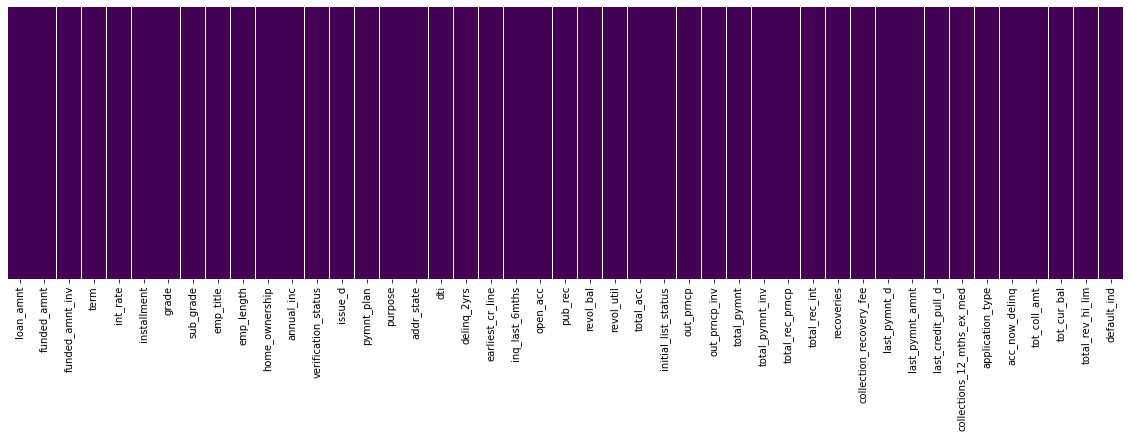

In [23]:
plt.figure(figsize = (20, 5))
sns.heatmap(df1.isnull(), cbar = False, yticklabels = False, cmap = "viridis")

## Data Visualization

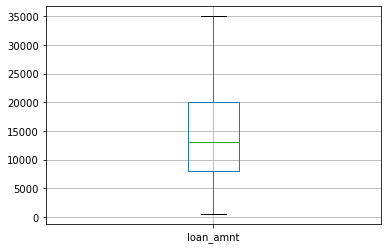

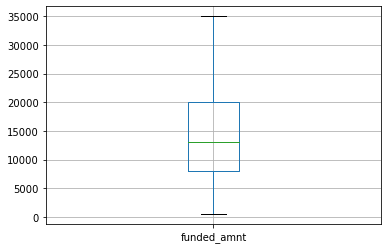

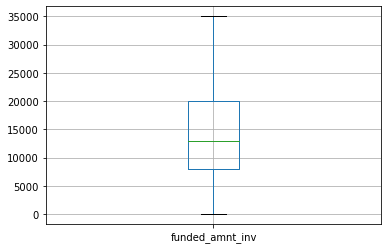

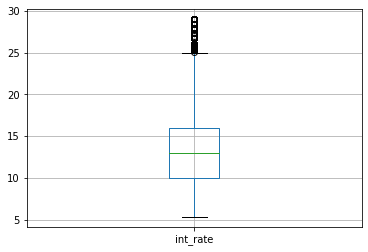

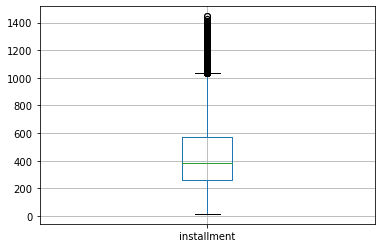

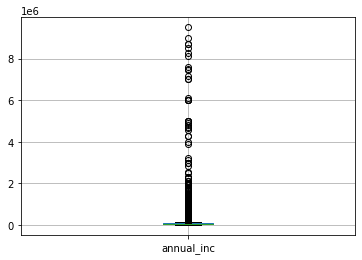

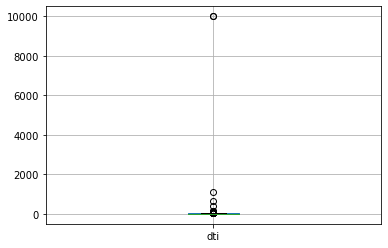

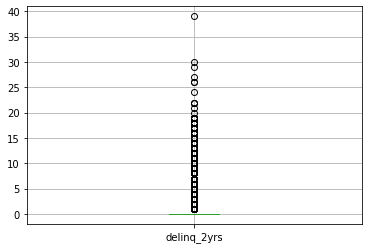

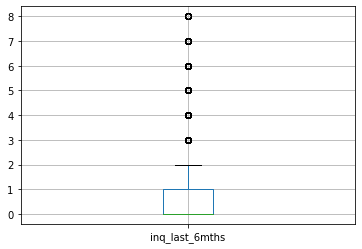

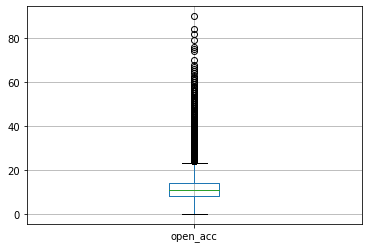

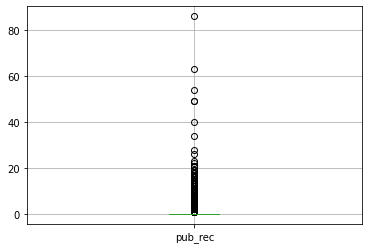

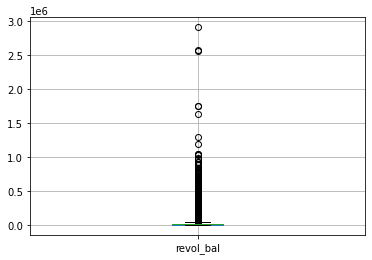

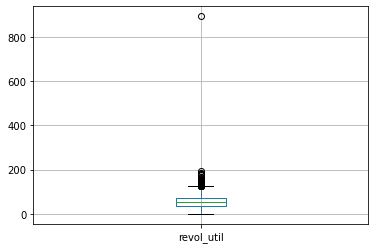

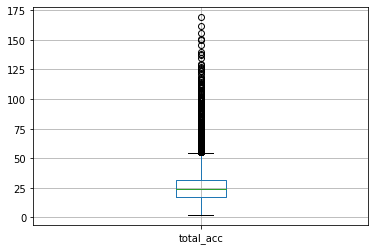

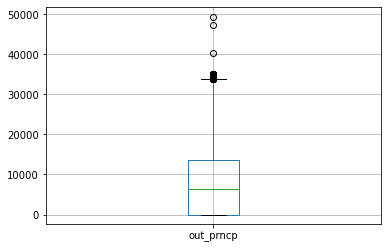

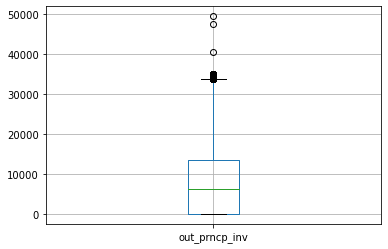

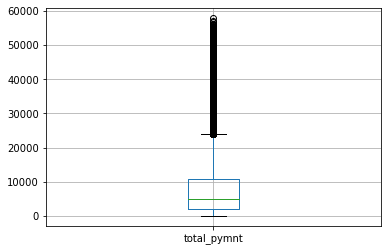

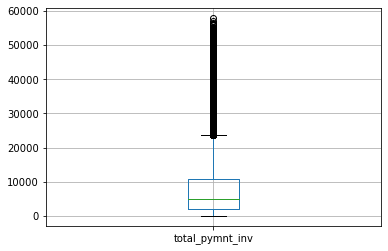

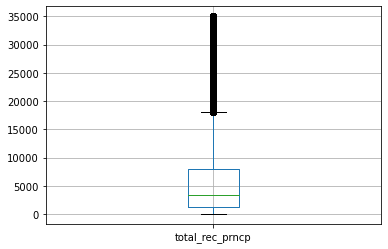

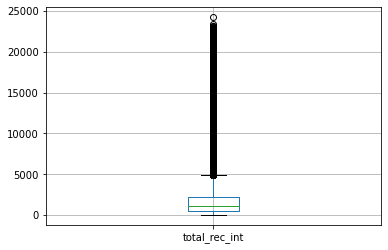

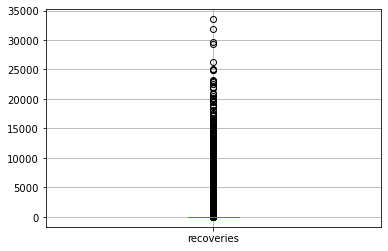

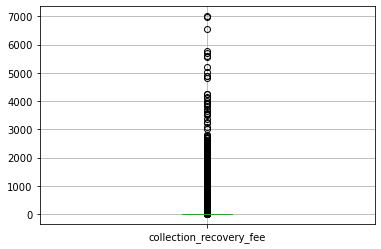

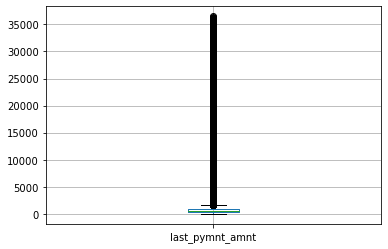

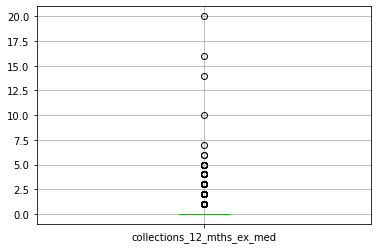

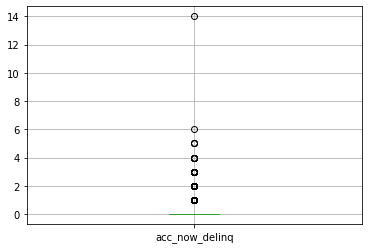

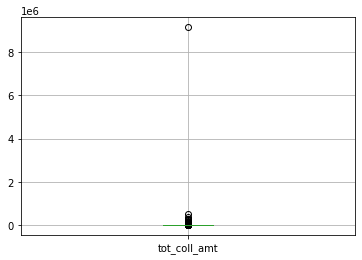

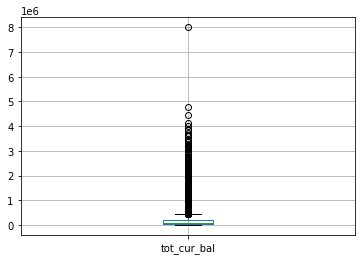

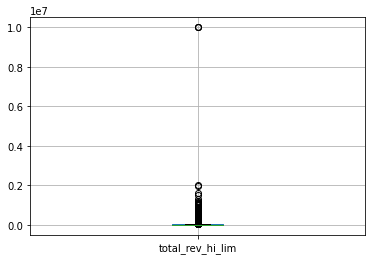

In [24]:
# Checking for outliers in the data using the boxplot
colname = []
for x in df1.columns[:-1]:
    if  df1[x].dtype == "float64":
        colname.append(x)

for x in colname:
    df1.boxplot(column = x)
    plt.show()

                            loan_amnt  funded_amnt  funded_amnt_inv  int_rate  \
loan_amnt                    1.000000     0.999265         0.997601  0.142966   
funded_amnt                  0.999265     1.000000         0.998485  0.143116   
funded_amnt_inv              0.997601     0.998485         1.000000  0.143374   
int_rate                     0.142966     0.143116         0.143374  1.000000   
installment                  0.944870     0.945903         0.944149  0.130468   
annual_inc                   0.335209     0.335002         0.334356 -0.073825   
dti                          0.020189     0.020583         0.021489  0.078454   
delinq_2yrs                 -0.000739    -0.000424         0.000050  0.055400   
inq_last_6mths              -0.028928    -0.029279        -0.030462  0.231705   
open_acc                     0.198926     0.199432         0.200055 -0.011091   
pub_rec                     -0.082199    -0.081858        -0.081008  0.052596   
revol_bal                   

<AxesSubplot:>

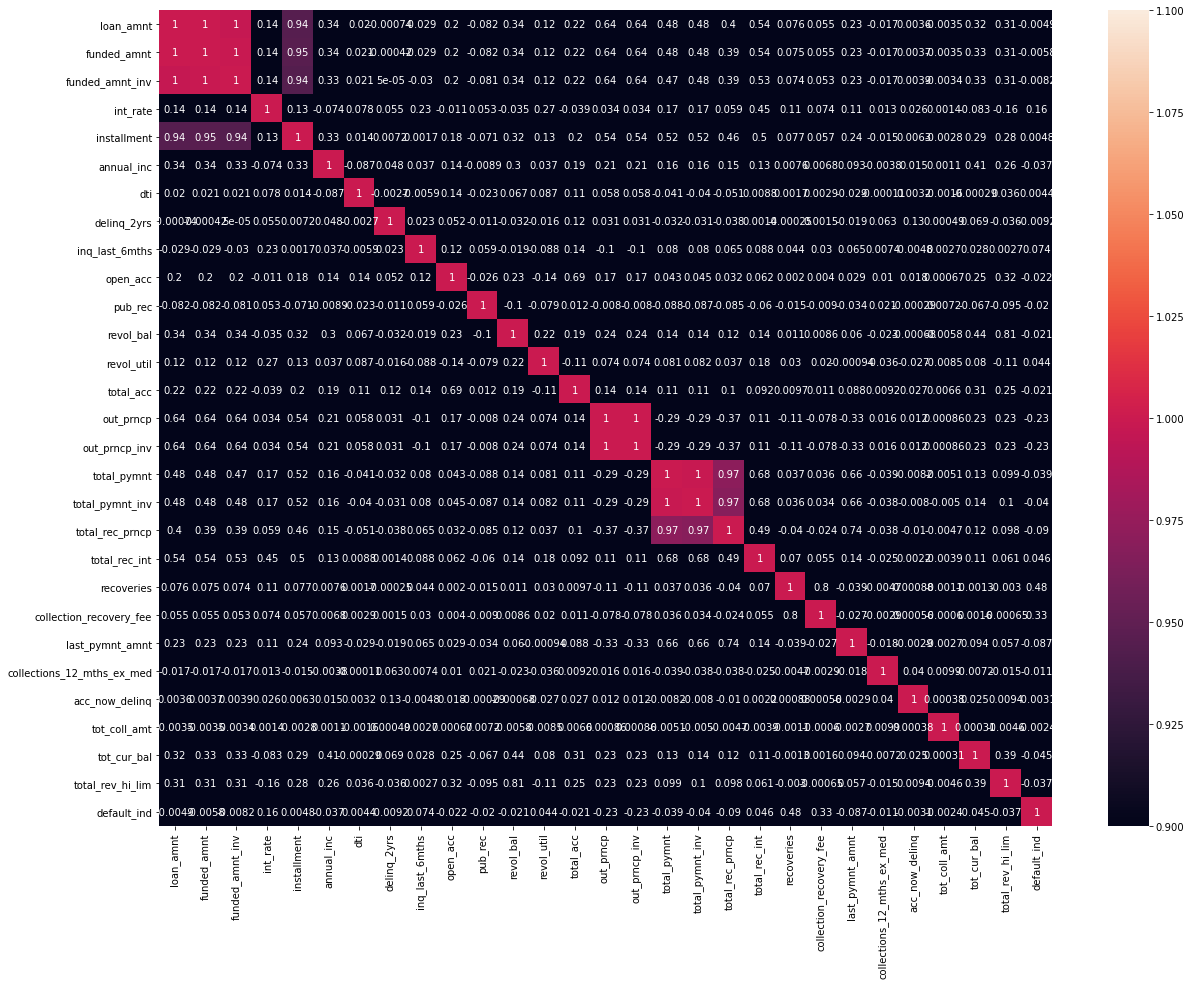

In [25]:
# Using heatmap to find the multicollinearity between the variables
import seaborn as sns
import matplotlib.pyplot as plt
corr_df = df1.corr(method = 'pearson')
print(corr_df)

plt.subplots(figsize = (20, 15))
sns.heatmap(corr_df, vmax = 1.0, vmin = 1.0, annot = True)


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 [Text(0, 0, 'debt_consolidation'),
  Text(1, 0, 'credit_card'),
  Text(2, 0, 'home_improvement'),
  Text(3, 0, 'other'),
  Text(4, 0, 'major_purchase'),
  Text(5, 0, 'small_business'),
  Text(6, 0, 'car'),
  Text(7, 0, 'medical'),
  Text(8, 0, 'moving'),
  Text(9, 0, 'vacation'),
  Text(10, 0, 'house'),
  Text(11, 0, 'wedding'),
  Text(12, 0, 'renewable_energy'),
  Text(13, 0, 'educational')])

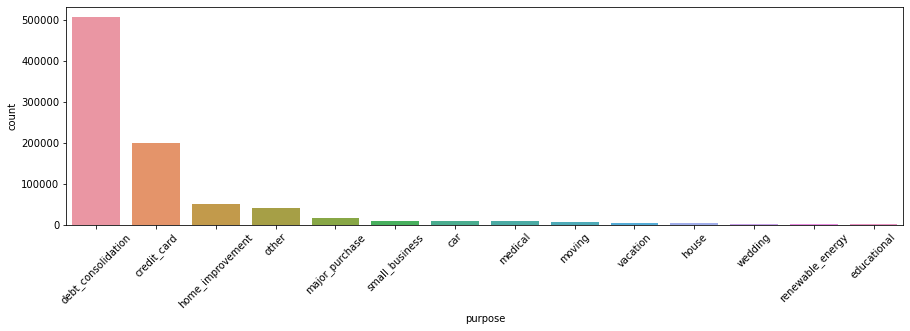

In [26]:
# Counting the number of amount of loan issued/requested for each purpose
plt.figure(figsize = (15, 4))
sns.countplot(x = "purpose", data=df1,order=df1["purpose"].value_counts().index)
plt.xticks(rotation = 45, fontsize = 10)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 [Text(0, 0, 'credit_card'),
  Text(1, 0, 'car'),
  Text(2, 0, 'small_business'),
  Text(3, 0, 'other'),
  Text(4, 0, 'wedding'),
  Text(5, 0, 'debt_consolidation'),
  Text(6, 0, 'home_improvement'),
  Text(7, 0, 'major_purchase'),
  Text(8, 0, 'medical'),
  Text(9, 0, 'moving'),
  Text(10, 0, 'vacation'),
  Text(11, 0, 'house'),
  Text(12, 0, 'renewable_energy'),
  Text(13, 0, 'educational')])

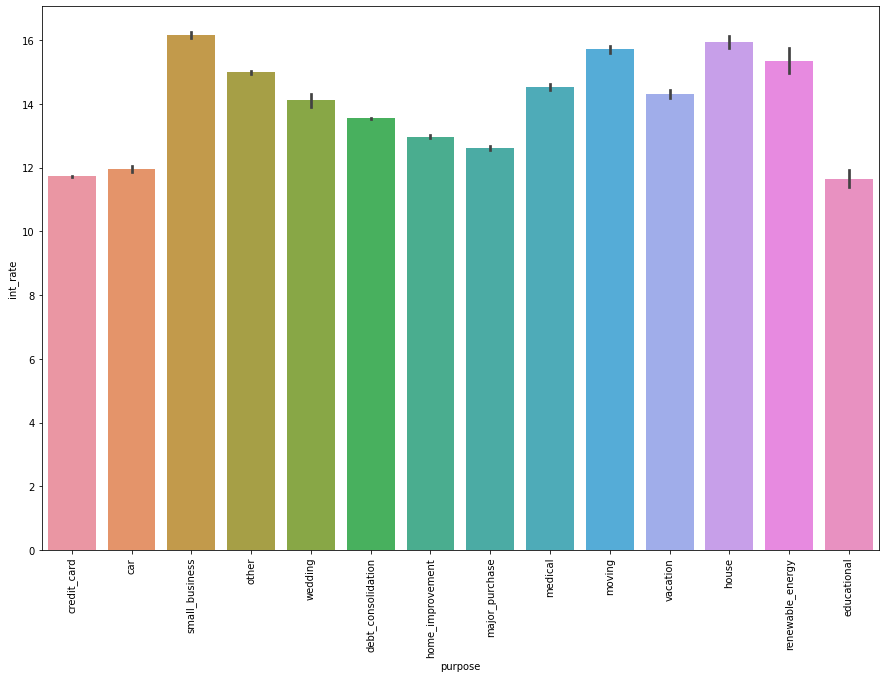

In [27]:
# Plotting the barplot with respect to the interest rate on different purposes

plt.figure(figsize = (15, 10))
sns.barplot(x = "purpose",y = "int_rate", data = df1)
plt.xticks(rotation = 90)

In [28]:
Non_Defaulters = round(df1['default_ind'].value_counts()[0]/len(df1) * 100, 2)

Defaulters = round(df1['default_ind'].value_counts()[1]/len(df1) * 100, 2)

print('Non_Defaulters : {} %'.format(Non_Defaulters))
print('Defaulters : {} % '.format(Defaulters))

Non_Defaulters : 94.57 %
Defaulters : 5.43 % 


<AxesSubplot:xlabel='default_ind', ylabel='count'>

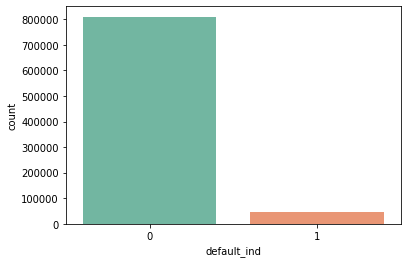

In [41]:
sns.countplot('default_ind', data=df1,palette="Set2")

#94.57 % are Non Defaulters and 
#5.43 %  are Non Defaulters,i.e. highly unbalanced data

<AxesSubplot:xlabel='term', ylabel='count'>

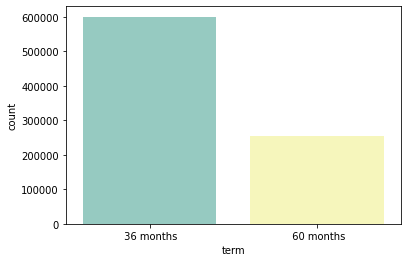

In [47]:
sns.countplot('term', data=df1,palette="Set3")

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'G'),
  Text(1, 0, 'F'),
  Text(2, 0, 'E'),
  Text(3, 0, 'D'),
  Text(4, 0, 'C'),
  Text(5, 0, 'B'),
  Text(6, 0, 'A')])

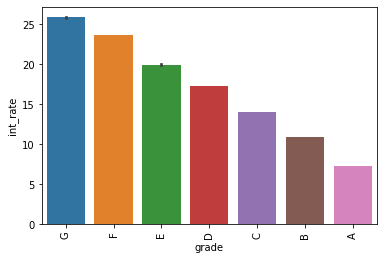

In [49]:
sns.barplot(y="int_rate",x="grade",data=df1,estimator=np.mean,order=df1.grade.value_counts().index.sort_values(ascending=False))
plt.xticks(rotation=90)


Text(0.5, 1.0, 'Distribution of Employee length')

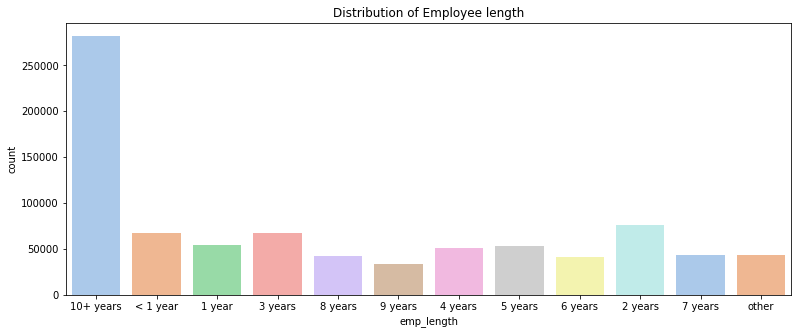

In [61]:
plt.figure(figsize=(13,5))
sns.countplot('emp_length', data=df1,palette="pastel")
plt.title("Distribution of Employee length")

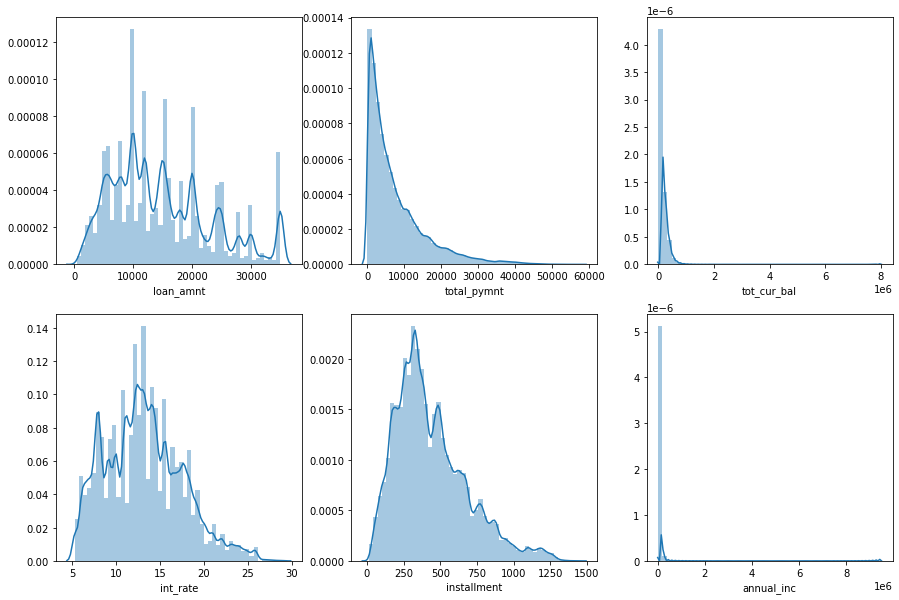

In [27]:
# Plotting different numerical variables using the distribution plot
plt.figure(figsize = (15, 10))

plt.subplot(2,3,1)
sns.distplot(df1["loan_amnt"])
plt.subplot(2,3,2)
sns.distplot(df1["total_pymnt"])
plt.subplot(2,3,3)
sns.distplot(df1["tot_cur_bal"])
plt.subplot(2,3,4)
sns.distplot(df1["int_rate"])
plt.subplot(2,3,5)
sns.distplot(df1["installment"])
plt.subplot(2,3,6)
sns.distplot(df1["annual_inc"])

### Label Encoding

In [29]:
colname=["addr_state", "application_type", "earliest_cr_line", "emp_length", "emp_title", "grade", "home_ownership",
         "initial_list_status", "purpose", "sub_grade", "term", "verification_status", "pymnt_plan",
         "last_credit_pull_d","last_pymnt_d"]
from sklearn import preprocessing

le = preprocessing.LabelEncoder()

for x in colname:
    df1[x] = le.fit_transform(df1[x])

In [30]:
df1.shape

(855969, 45)

### Train, Test split on the issue_d

In [31]:
import pandas as pd
df1['issue_d'] = pd.to_datetime(df1['issue_d'])
df1 = df1.set_index(df1['issue_d'])
df1 = df1.sort_index()

In [32]:
# create train test partition
train = df1['Jun-2007':'May-2015']
test  = df1['Jun-2015':'Dec-2015']
print('Train Dataset:',train.shape)
print('Test Dataset:',test.shape)

Train Dataset: (598978, 45)
Test Dataset: (256991, 45)


In [33]:
df1.shape

(855969, 45)

In [34]:
print(train["default_ind"].value_counts())
print(test["default_ind"].value_counts())

0    552822
1     46156
Name: default_ind, dtype: int64
0    256680
1       311
Name: default_ind, dtype: int64


In [35]:
# Dropping the issue_d variable as it is not required now
train.drop(columns = ["issue_d"], axis = 1, inplace = True)
test.drop(columns = ["issue_d"], axis = 1, inplace = True)

In [36]:
train.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,pymnt_plan,purpose,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,default_ind
issue_d,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2007-06-01,7500.0,7500.0,800.0,0,13.75,255.43,4,21,80191,10,4,22000.0,0,0,2,19,14.29,1.0,630,0.0,7.0,0.0,4175.0,51.5,8.0,0,0.0,0.0,9194.98,980.65,7500.0,1694.98,0.0,0.0,51,256.59,54,0.0,0,0.0,0.0,81008.5,23800.0,0
2007-07-01,5000.0,5000.0,4150.0,0,7.43,155.38,0,1,155048,8,1,150000.0,0,0,4,10,0.00,0.0,146,0.0,2.0,0.0,6053.0,19.5,19.0,0,0.0,0.0,5174.17,4294.57,5000.0,174.17,0.0,0.0,32,4397.47,51,0.0,0,0.0,0.0,81008.5,23800.0,0
2007-07-01,5750.0,5750.0,3675.0,0,7.43,178.69,0,1,82082,1,1,125000.0,0,0,2,19,0.27,0.0,265,0.0,10.0,0.0,2817.0,10.2,16.0,0,0.0,0.0,6421.50,4104.19,5750.0,671.50,0.0,0.0,67,4.74,1,0.0,0,0.0,0.0,81008.5,23800.0,0
2007-07-01,5000.0,5000.0,3975.0,0,7.43,155.38,0,1,149424,6,5,40000.0,0,0,0,48,2.55,0.0,197,2.0,4.0,0.0,2562.0,14.0,7.0,0,0.0,0.0,5593.39,4446.74,5000.0,593.39,0.0,0.0,10,158.65,81,0.0,0,0.0,0.0,81008.5,23800.0,0
2007-07-01,1200.0,1200.0,0.0,0,11.54,39.60,2,14,75143,10,5,20000.0,0,0,1,21,2.04,0.0,512,2.0,3.0,0.0,1153.0,75.8,4.0,0,0.0,0.0,1425.37,0.00,1200.0,225.37,0.0,0.0,43,39.45,45,0.0,0,0.0,0.0,81008.5,23800.0,0


In [37]:
test.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,pymnt_plan,purpose,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,default_ind
issue_d,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2015-06-01,35000.0,35000.0,35000.0,0,9.17,1115.77,1,6,34645,0,1,130000.0,2,0,2,35,26.59,0.0,101,0.0,25.0,0.0,45846.0,65.0,44.0,1,28923.94,28923.94,7792.56,7792.56,6076.06,1716.50,0.0,0.0,40,1115.77,41,0.0,0,0.0,0.0,227294.0,70500.0,0
2015-06-01,11500.0,11500.0,11475.0,1,9.17,239.68,1,6,217418,1,5,74000.0,1,0,2,19,23.61,0.0,28,0.0,7.0,0.0,20480.0,61.1,11.0,1,10571.62,10548.63,1432.22,1429.11,928.38,503.84,0.0,0.0,23,239.68,41,0.0,0,0.0,0.0,56802.0,33500.0,0
2015-06-01,12000.0,12000.0,12000.0,1,15.61,289.34,3,15,259939,2,5,48000.0,1,0,2,35,31.40,0.0,511,1.0,9.0,0.0,15264.0,74.8,23.0,1,11174.11,11174.11,1725.63,1725.63,825.89,899.74,0.0,0.0,23,289.34,41,0.0,0,0.0,0.0,60872.0,20400.0,0
2015-06-01,35000.0,35000.0,35000.0,0,12.29,1167.36,2,10,107886,3,1,121000.0,2,0,2,43,22.18,3.0,152,0.0,10.0,0.0,27999.0,76.9,35.0,1,29160.72,29160.72,8167.03,8167.03,5839.28,2327.75,0.0,0.0,40,1167.36,41,0.0,0,0.0,0.0,277104.0,36400.0,0
2015-06-01,27000.0,27000.0,27000.0,1,8.18,549.80,1,5,255508,1,1,100000.0,1,0,1,34,18.73,0.0,216,0.0,16.0,0.0,28486.0,61.0,39.0,1,24386.79,24386.79,3824.06,3824.06,2613.21,1210.85,0.0,0.0,40,549.80,41,0.0,0,0.0,0.0,209664.0,46700.0,0


In [38]:
df1.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status', 'issue_d',
       'pymnt_plan', 'purpose', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'inq_last_6mths', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'initial_list_status',
       'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_prncp', 'total_rec_int', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'last_credit_pull_d', 'collections_12_mths_ex_med', 'application_type',
       'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim',
       'default_ind'],
      dtype='object')

In [39]:
#removed issue_id for chi2 Test

df1=df1[['addr_state', 'annual_inc', 'application_type', 'collection_recovery_fee', 'collections_12_mths_ex_med',
         'delinq_2yrs', 'dti', 'earliest_cr_line', 'emp_length', 'emp_title', 'funded_amnt', 'funded_amnt_inv', 'grade',
         'home_ownership', 'initial_list_status', 'inq_last_6mths', 'installment', 'int_rate', 'last_pymnt_amnt', 'loan_amnt',
         'purpose', 'sub_grade', 'term', 'total_acc', 'total_pymnt', 'total_pymnt_inv', 'total_rec_int', 'total_rec_prncp',
         'total_rev_hi_lim', 'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'verification_status', 'open_acc', 'out_prncp',
         'out_prncp_inv', 'pub_rec', 'pymnt_plan', 'recoveries', 'revol_bal', 'revol_util', 'last_credit_pull_d', 
         'last_pymnt_d', 'default_ind']]

In [40]:
train.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status', 'pymnt_plan',
       'purpose', 'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'initial_list_status', 'out_prncp', 'out_prncp_inv',
       'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'recoveries', 'collection_recovery_fee', 'last_pymnt_d',
       'last_pymnt_amnt', 'last_credit_pull_d', 'collections_12_mths_ex_med',
       'application_type', 'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal',
       'total_rev_hi_lim', 'default_ind'],
      dtype='object')

In [41]:
test.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status', 'pymnt_plan',
       'purpose', 'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'initial_list_status', 'out_prncp', 'out_prncp_inv',
       'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'recoveries', 'collection_recovery_fee', 'last_pymnt_d',
       'last_pymnt_amnt', 'last_credit_pull_d', 'collections_12_mths_ex_med',
       'application_type', 'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal',
       'total_rev_hi_lim', 'default_ind'],
      dtype='object')

In [42]:
train.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,pymnt_plan,purpose,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,default_ind
issue_d,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2007-06-01,7500.0,7500.0,800.0,0,13.75,255.43,4,21,80191,10,4,22000.0,0,0,2,19,14.29,1.0,630,0.0,7.0,0.0,4175.0,51.5,8.0,0,0.0,0.0,9194.98,980.65,7500.0,1694.98,0.0,0.0,51,256.59,54,0.0,0,0.0,0.0,81008.5,23800.0,0
2007-07-01,5000.0,5000.0,4150.0,0,7.43,155.38,0,1,155048,8,1,150000.0,0,0,4,10,0.00,0.0,146,0.0,2.0,0.0,6053.0,19.5,19.0,0,0.0,0.0,5174.17,4294.57,5000.0,174.17,0.0,0.0,32,4397.47,51,0.0,0,0.0,0.0,81008.5,23800.0,0
2007-07-01,5750.0,5750.0,3675.0,0,7.43,178.69,0,1,82082,1,1,125000.0,0,0,2,19,0.27,0.0,265,0.0,10.0,0.0,2817.0,10.2,16.0,0,0.0,0.0,6421.50,4104.19,5750.0,671.50,0.0,0.0,67,4.74,1,0.0,0,0.0,0.0,81008.5,23800.0,0
2007-07-01,5000.0,5000.0,3975.0,0,7.43,155.38,0,1,149424,6,5,40000.0,0,0,0,48,2.55,0.0,197,2.0,4.0,0.0,2562.0,14.0,7.0,0,0.0,0.0,5593.39,4446.74,5000.0,593.39,0.0,0.0,10,158.65,81,0.0,0,0.0,0.0,81008.5,23800.0,0
2007-07-01,1200.0,1200.0,0.0,0,11.54,39.60,2,14,75143,10,5,20000.0,0,0,1,21,2.04,0.0,512,2.0,3.0,0.0,1153.0,75.8,4.0,0,0.0,0.0,1425.37,0.00,1200.0,225.37,0.0,0.0,43,39.45,45,0.0,0,0.0,0.0,81008.5,23800.0,0


### Feature Selection  using chi2 Test and Corr Plot

In [43]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

X = df1.iloc[:,:-1]  #independent columns
y = df1.iloc[:,-1]    #target column 

#apply SelectKBest class to extract top best features
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(20,'Score'))  #print best features


                      Specs         Score
38               recoveries  7.021912e+08
34                out_prncp  3.777268e+08
35            out_prncp_inv  3.775692e+08
31              tot_cur_bal  2.849914e+08
3   collection_recovery_fee  7.383192e+07
18          last_pymnt_amnt  6.922982e+07
1                annual_inc  6.469676e+07
27          total_rec_prncp  5.321638e+07
28         total_rev_hi_lim  5.003542e+07
9                 emp_title  1.339562e+07
25          total_pymnt_inv  1.130183e+07
24              total_pymnt  1.076228e+07
39                revol_bal  1.070752e+07
26            total_rec_int  4.481917e+06
30             tot_coll_amt  2.496896e+06
11          funded_amnt_inv  2.785645e+05
10              funded_amnt  1.383988e+05
19                loan_amnt  9.921273e+04
42             last_pymnt_d  8.201850e+04
21                sub_grade  5.288456e+04


In [44]:
df2=df1[['out_prncp', 'tot_cur_bal', 'collection_recovery_fee', 'last_pymnt_amnt', 'annual_inc',
                         'total_rec_prncp', 'total_rev_hi_lim', 'total_pymnt', 'total_rec_int', 'funded_amnt', 'emp_title',
                         'loan_amnt','sub_grade','tot_coll_amt','revol_bal', 'last_pymnt_d','last_credit_pull_d']]

<AxesSubplot:>

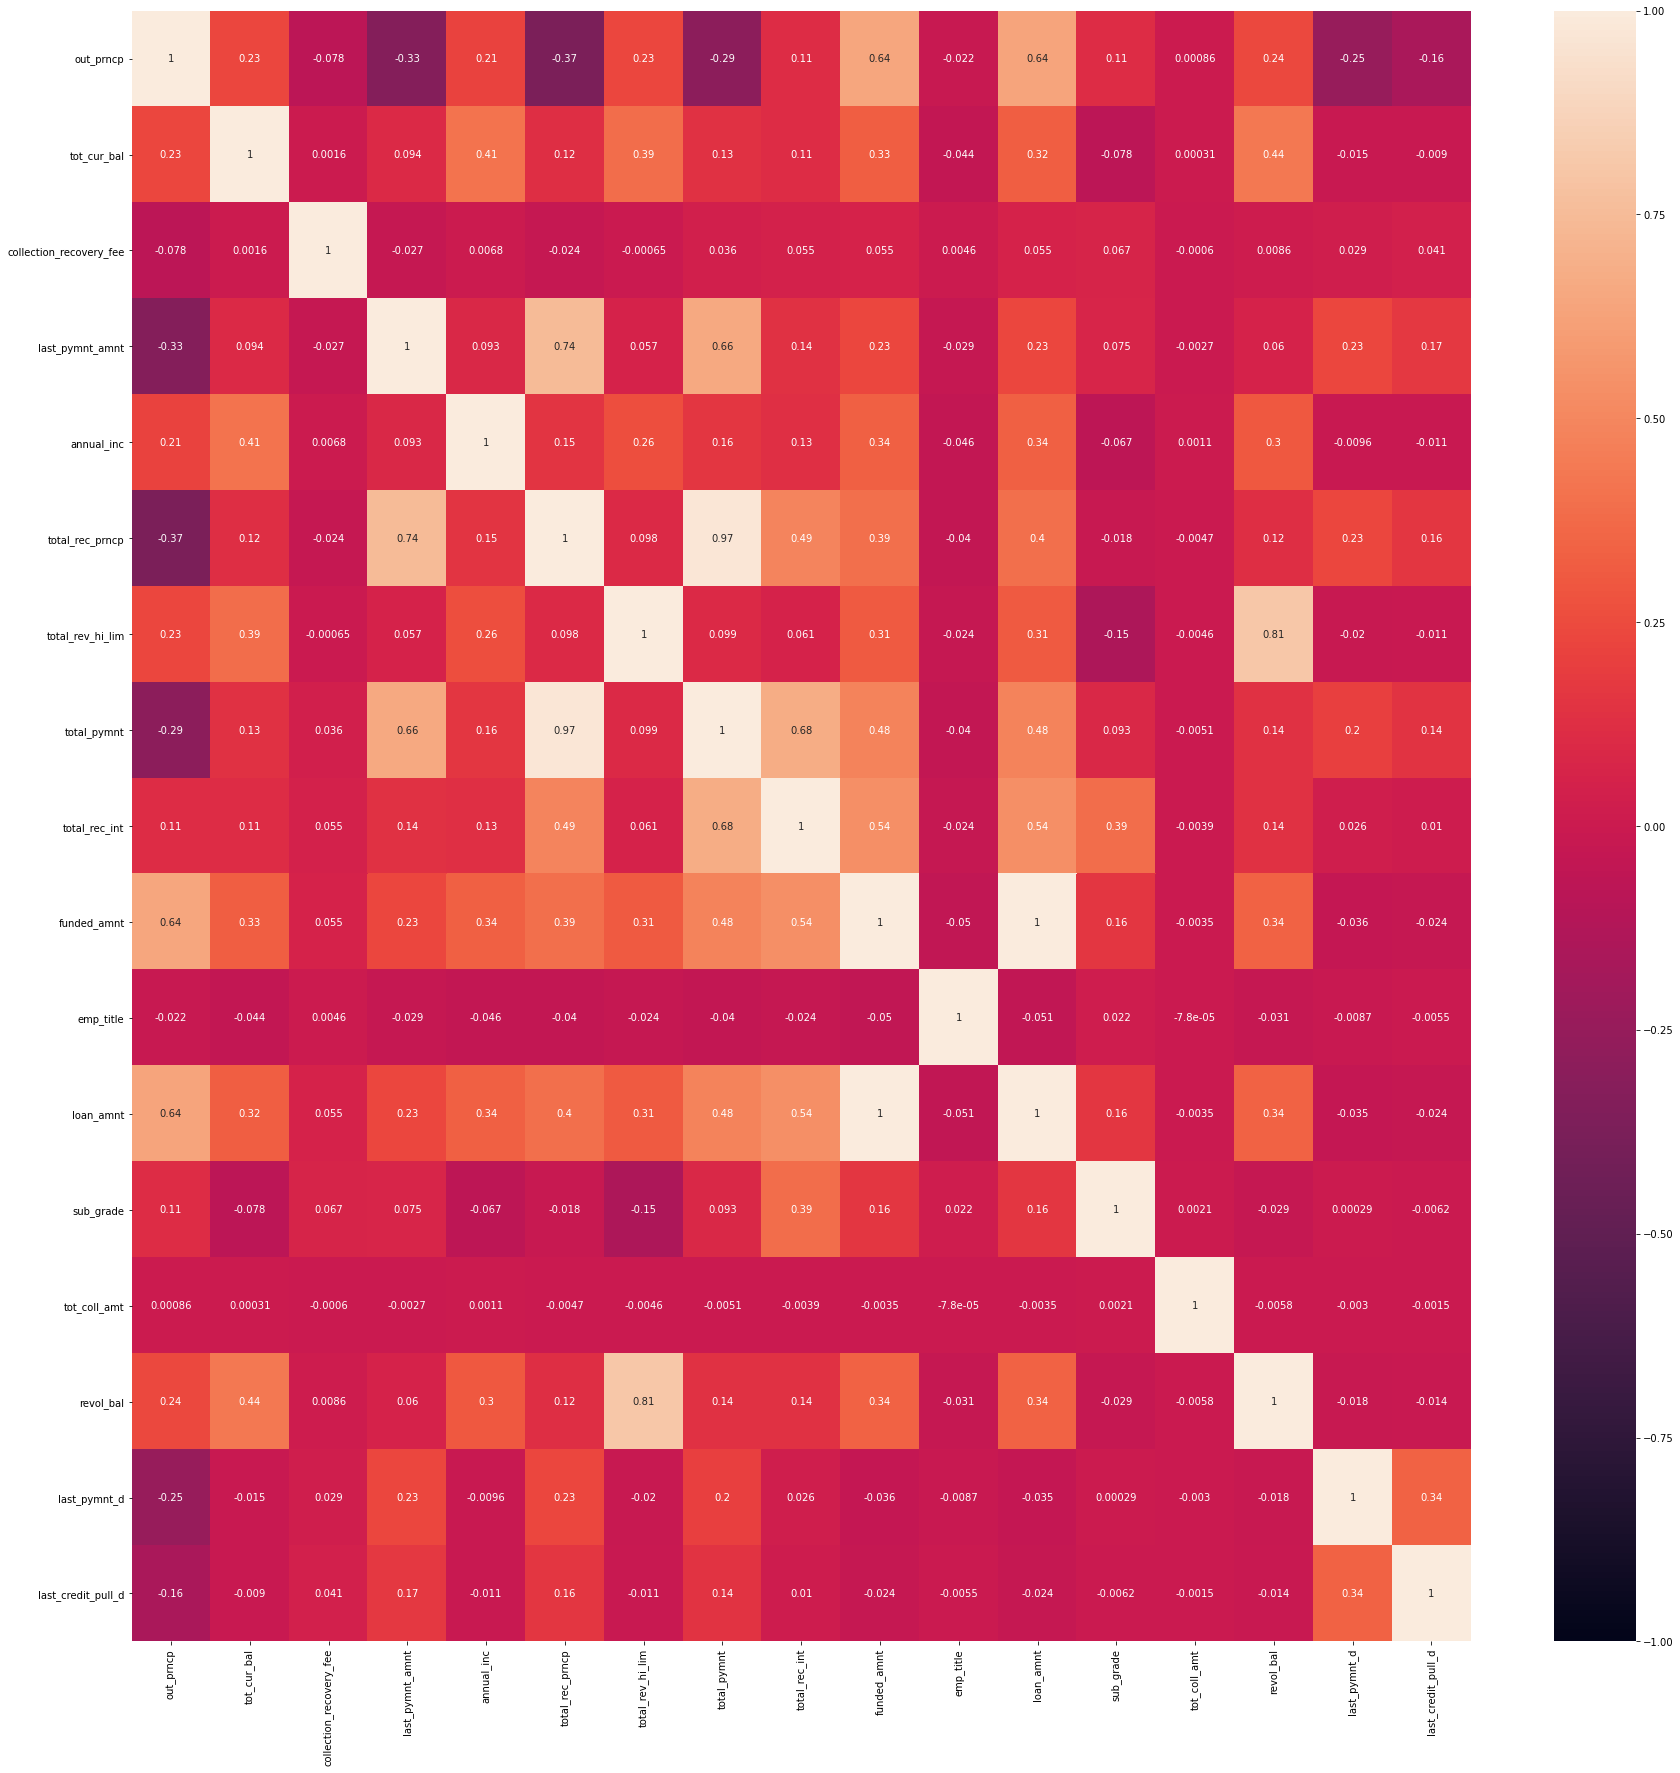

In [45]:
plt.subplots(figsize = (30, 30))

corr_df=df2.corr(method="pearson")
#print(corr_df)

sns.heatmap(corr_df,vmax=1.0,vmin=-1.0,annot=True)

we removed all inv columns fo example, 'out_prncp' and 'out_prncp_inv' which gives same information and same score

remove funded_amt as corr is 1 for loan_amt and funded_amt

total paymnt and total_rec_princpl have corr 0.97 so removed

revol_bal and total_rev_hi_lim have corr of 0.81 so removed

### Outlier Imputation 

Outlier Imputation for 1

In [46]:
outliers_1 = train[train["default_ind"] == 1]

In [47]:
# Creating a dataframe of all the outliers 
outliers_det = outliers_1[['out_prncp', 'tot_cur_bal', 'collection_recovery_fee', 'last_pymnt_amnt', 'annual_inc',
                         'total_rec_prncp', 'total_rec_int', 'emp_title',
                         'loan_amnt','sub_grade','tot_coll_amt','revol_bal', 'last_pymnt_d','last_credit_pull_d','default_ind']]

In [48]:
outliers_det.shape

(46156, 15)

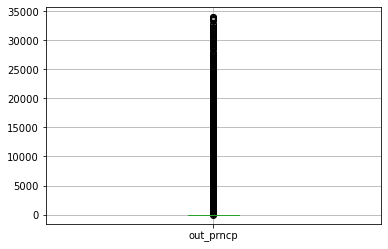

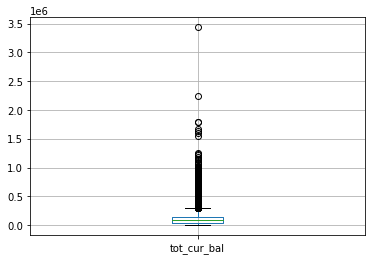

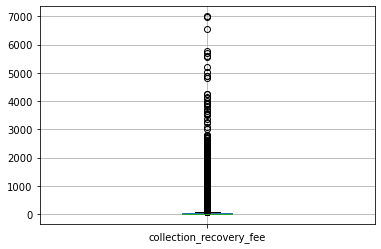

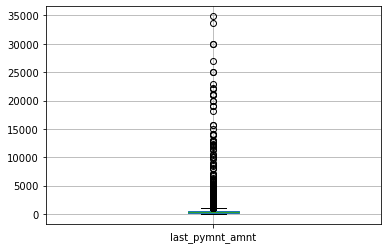

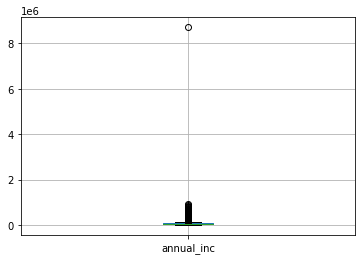

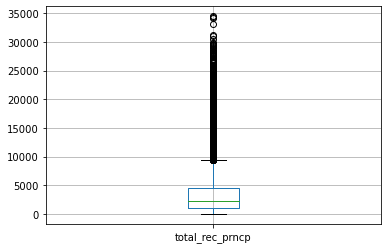

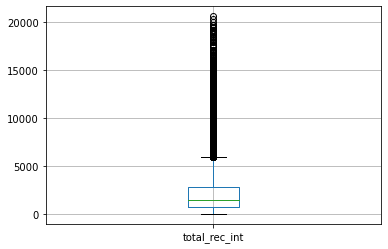

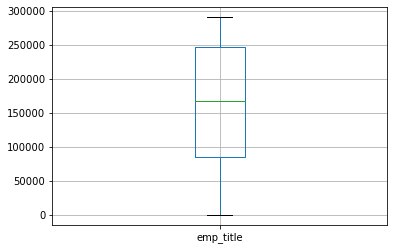

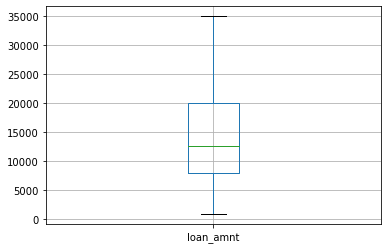

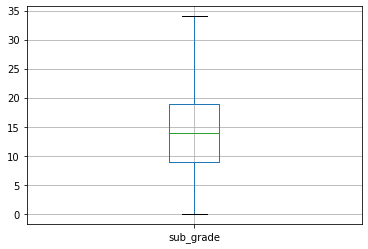

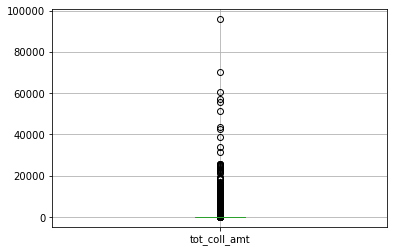

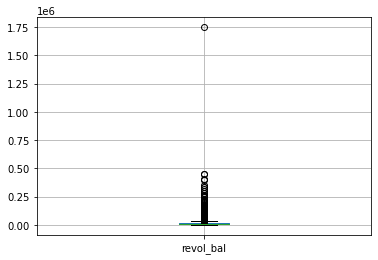

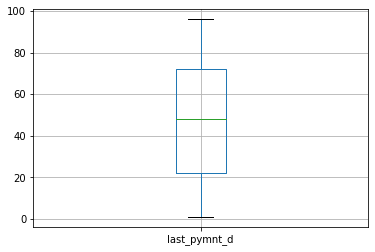

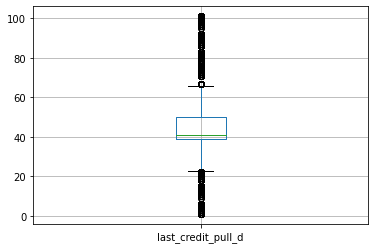

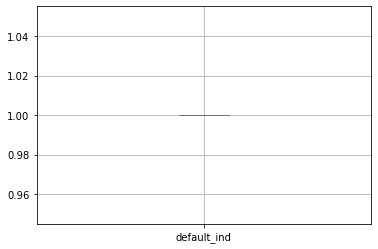

In [49]:
# Visualizing the outliers present in the dataframe
for i in outliers_det.columns:
    outliers_det.boxplot(column = i)
    plt.show()

In [50]:
print("annual_inc")
print(outliers_det['annual_inc'].describe())
print('tot_coll_amt')
print(outliers_det['tot_coll_amt'].describe())
print('last_pymnt_amnt')
print(outliers_det['last_pymnt_amnt'].describe())
print('tot_cur_bal')
print(outliers_det['tot_cur_bal'].describe())

annual_inc
count    4.615600e+04
mean     6.508107e+04
std      5.666153e+04
min      4.080000e+03
25%      4.000000e+04
50%      5.600000e+04
75%      7.800000e+04
max      8.706582e+06
Name: annual_inc, dtype: float64
tot_coll_amt
count    46156.000000
mean       104.054142
std       1153.000028
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max      95806.000000
Name: tot_coll_amt, dtype: float64
last_pymnt_amnt
count    46156.000000
mean       455.667039
std        650.138490
min          0.000000
25%        238.945000
50%        376.700000
75%        569.115000
max      34833.350000
Name: last_pymnt_amnt, dtype: float64
tot_cur_bal
count    4.615600e+04
mean     1.071359e+05
std      1.139300e+05
min      0.000000e+00
25%      3.210400e+04
50%      8.100850e+04
75%      1.374945e+05
max      3.437283e+06
Name: tot_cur_bal, dtype: float64


The Thershold are set by checking the 1 so to prevent missclassification

In [51]:
train_1 = outliers_det[outliers_det["annual_inc"] < 200000]
train_1 = train_1[train_1['tot_coll_amt'] < 7500]
train_1 = train_1[train_1['last_pymnt_amnt'] < 1500]
train_1 = train_1[train_1['tot_cur_bal'] < 510000]

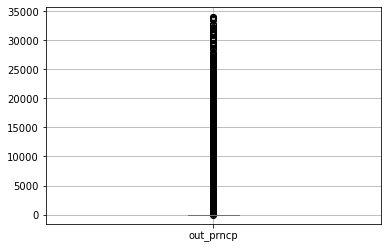

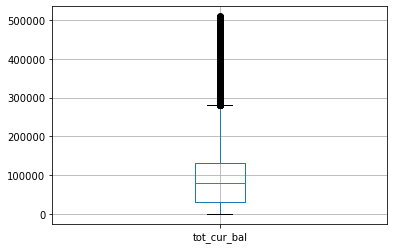

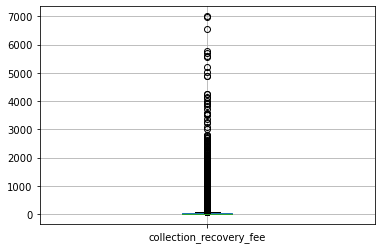

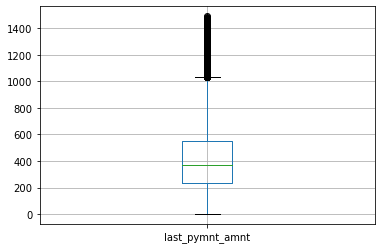

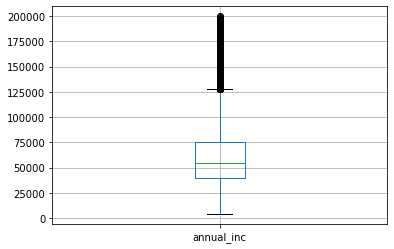

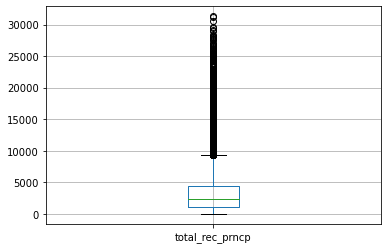

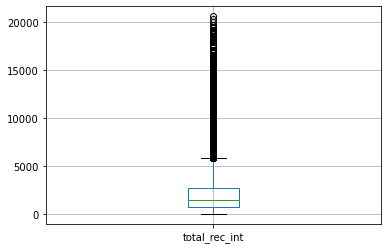

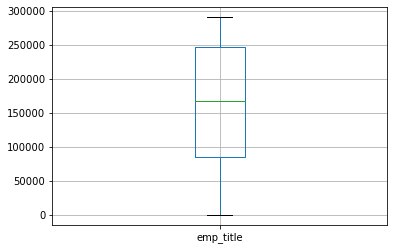

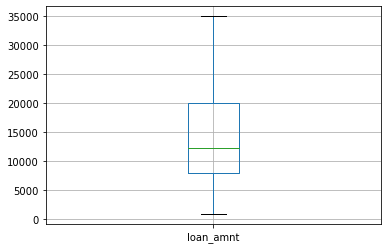

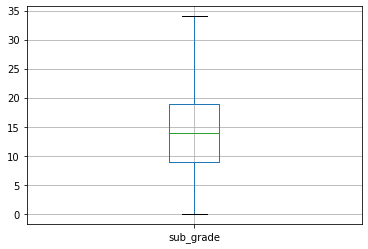

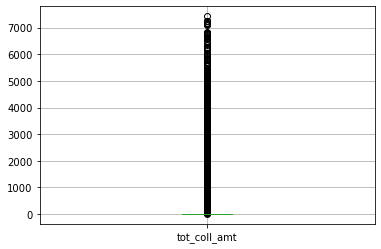

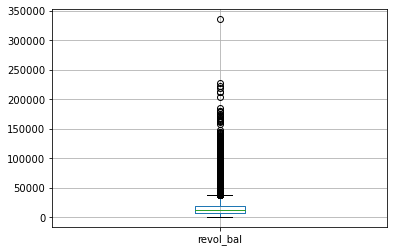

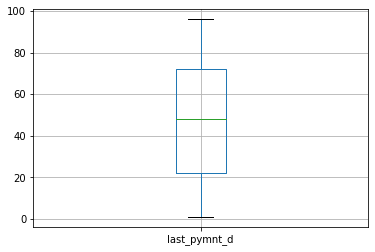

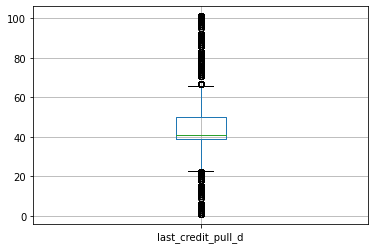

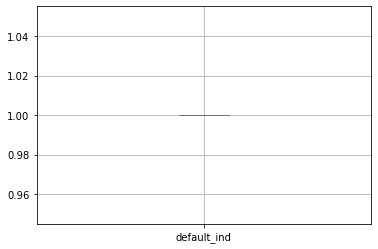

In [52]:
for i in train_1.columns:
    train_1.boxplot(column=i)
    plt.show()

Checking outliers for 0

In [53]:
outliers_2 = train[train["default_ind"] == 0]

In [54]:
train_2 = outliers_2[['out_prncp', 'tot_cur_bal', 'collection_recovery_fee', 'last_pymnt_amnt', 'annual_inc',
                         'total_rec_prncp', 'total_rec_int', 'emp_title',
                         'loan_amnt','sub_grade','tot_coll_amt','revol_bal', 'last_pymnt_d','last_credit_pull_d','default_ind']]

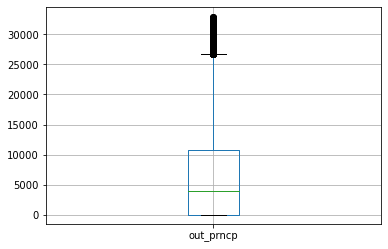

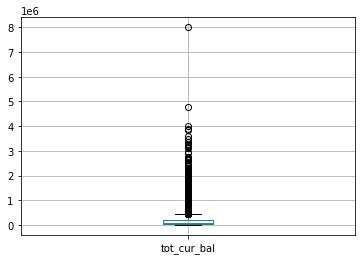

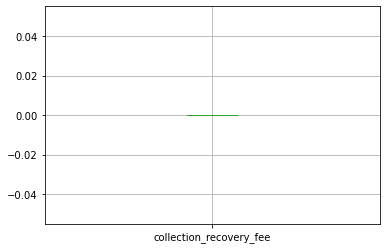

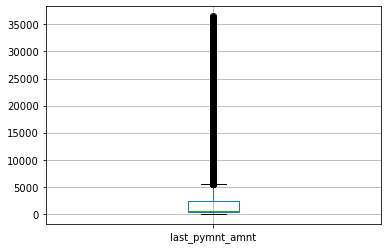

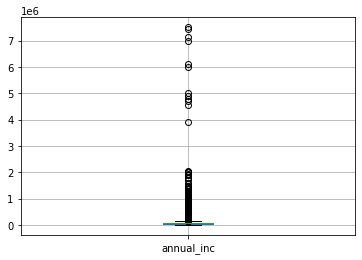

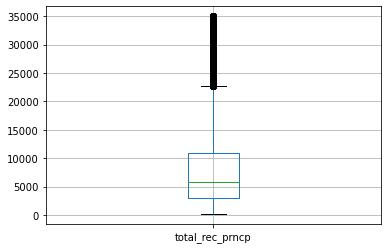

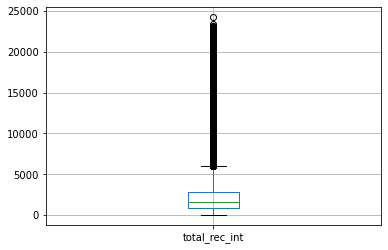

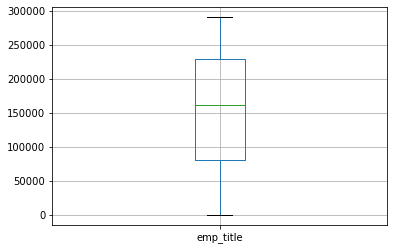

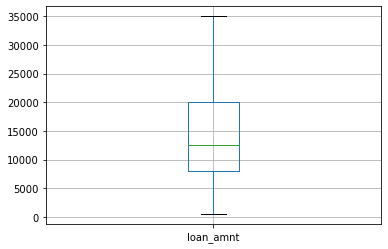

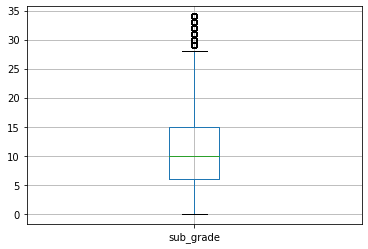

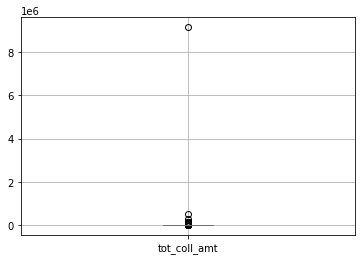

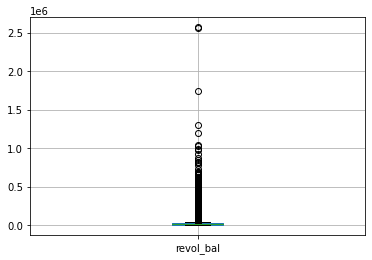

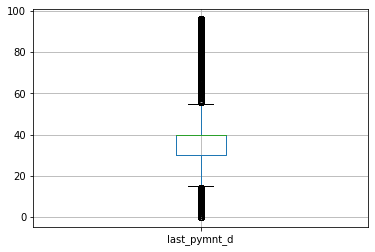

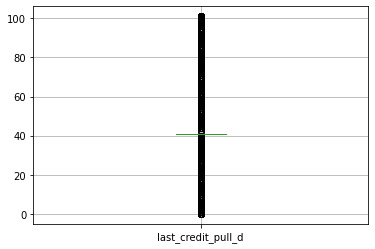

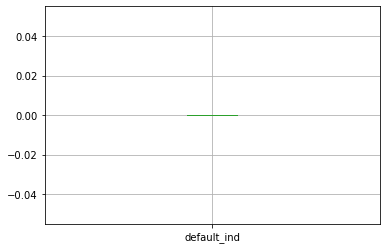

In [55]:
for i in train_2.columns:
    train_2.boxplot(column=i)
    plt.show()

In [56]:
final_train = pd.concat((train_1,train_2), axis = 0)

In [57]:
final_train['default_ind'].value_counts()

0    552822
1     44761
Name: default_ind, dtype: int64

In [58]:
from sklearn.utils import resample
# Separate majority and minority classes
df_majority = final_train[final_train.default_ind==0]
df_minority = final_train[final_train.default_ind==1]

# Upsample minority class
df_minority_upsampled = resample(df_minority,
                                 replace=True, # sample with replacement
                                 n_samples=500000, # to match majority class
                                 random_state=10) # reproducible results

# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_majority, df_minority_upsampled])

# Display new class counts
df_upsampled.default_ind.value_counts()

0    552822
1    500000
Name: default_ind, dtype: int64

### Final Train - Test Split

In [97]:
X_train = final_train[['out_prncp', 'tot_cur_bal', 'collection_recovery_fee', 'last_pymnt_amnt', 'annual_inc',
                         'total_rec_prncp', 'total_rec_int', 'emp_title',
                         'loan_amnt','sub_grade','tot_coll_amt','revol_bal', 'last_pymnt_d','last_credit_pull_d']].values

In [98]:
Y_train = final_train["default_ind"]

In [99]:
X_test = test[['out_prncp', 'tot_cur_bal', 'collection_recovery_fee', 'last_pymnt_amnt', 'annual_inc',
                         'total_rec_prncp', 'total_rec_int', 'emp_title',
                         'loan_amnt','sub_grade','tot_coll_amt','revol_bal', 'last_pymnt_d','last_credit_pull_d']].values

In [100]:
Y_test = test["default_ind"]

### Scaling Data

In [101]:
from sklearn.preprocessing import StandardScaler

scalar=StandardScaler()
scalar.fit(X_train)


X_train=scalar.transform(X_train)
X_test=scalar.transform(X_test)


In [102]:
X_train

array([[-0.8127813 , -0.35429989, -0.0878753 , ..., -0.6305713 ,
         0.82174957, -0.19682495],
       [-0.8127813 , -0.35429989, -0.05006218, ..., -0.4806398 ,
         1.95289896,  1.09953788],
       [-0.8127813 , -0.35429989, -0.09317751, ..., -0.65669464,
         0.72338875, -0.19682495],
       ...,
       [ 0.92267243,  0.72699958, -0.09317751, ...,  0.40369051,
        -0.11267819, -0.19682495],
       [ 0.27187388,  0.01417887, -0.09317751, ..., -0.7696865 ,
        -0.11267819, -0.19682495],
       [-0.8127813 , -0.01949879, -0.09317751, ..., -0.49464306,
         2.64142467, -0.19682495]])

In [103]:
X_test

array([[ 3.13190708,  0.66148438, -0.09317751, ...,  1.41863747,
        -0.11267819, -0.19682495],
       [ 0.62899138, -0.52238614, -0.09317751, ...,  0.1937864 ,
        -0.94874513, -0.19682495],
       [ 0.71115983, -0.49412468, -0.09317751, ..., -0.05807921,
        -0.94874513, -0.19682495],
       ...,
       [ 0.80463703, -0.45261436, -0.09317751, ..., -0.21023193,
        -0.11267819, -0.19682495],
       [ 3.84842785, -0.85276054, -0.09317751, ..., -0.56330735,
        -0.11267819, -0.19682495],
       [ 3.83984946, -0.58422805, -0.09317751, ...,  1.37672425,
        -0.11267819, -0.19682495]])

In [104]:
# function to plot a confusion matrix 

import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
import itertools


def Confusion_matrix_visualization(cm,classes,
                         normalize=False,
                         title='Confusion Matrix',
                         cmap=plt.cm.Reds):
   
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized Confusion Matrix")
    else:
        print("Confusion Matrix")
        
    print(cm)
    
    plt.imshow(cm, interpolation='nearest',cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks,classes)
    plt.yticks(tick_marks,classes)
    
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() /2.
    
    for i , j in itertools.product(range(cm.shape[0]), range(cm.shape[0])):
        plt.text(j, i, format(cm[i,j], fmt),
                 horizontalalignment='center',
                 color='white' if cm[i, j] > thresh else 'black')
    
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

## Model Building & Validation

### Logistic Regression 

In [105]:
%%time
from sklearn.linear_model import LogisticRegression
#Create a model
classifier_lg=LogisticRegression()
classifier_lg.fit(X_train,Y_train)
#predict using model
Y_pred=classifier_lg.predict(X_test)

Wall time: 5.26 s


In [106]:
Y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [107]:
Y_pred_prob = classifier_lg.predict_proba(X_test)

In [108]:
Y_pred_prob

array([[9.99979724e-01, 2.02758969e-05],
       [9.94529253e-01, 5.47074745e-03],
       [9.91513346e-01, 8.48665364e-03],
       ...,
       [9.89873272e-01, 1.01267278e-02],
       [9.99963153e-01, 3.68472321e-05],
       [9.99849764e-01, 1.50235544e-04]])

In [109]:
for a in np.arange(0.4,0.71,0.01):
    predict_mine = np.where(Y_pred_prob[:,1] > a, 1, 0)
    cfm=confusion_matrix(Y_test, predict_mine)
    total_err=cfm[0,1]+cfm[1,0]
    print("Errors at threshold ", a, ":",total_err, " , type 2 error :",cfm[1,0]," , type 1 error:", cfm[0,1])

Errors at threshold  0.4 : 63  , type 2 error : 63  , type 1 error: 0
Errors at threshold  0.41000000000000003 : 63  , type 2 error : 63  , type 1 error: 0
Errors at threshold  0.42000000000000004 : 63  , type 2 error : 63  , type 1 error: 0
Errors at threshold  0.43000000000000005 : 63  , type 2 error : 63  , type 1 error: 0
Errors at threshold  0.44000000000000006 : 63  , type 2 error : 63  , type 1 error: 0
Errors at threshold  0.45000000000000007 : 63  , type 2 error : 63  , type 1 error: 0
Errors at threshold  0.4600000000000001 : 63  , type 2 error : 63  , type 1 error: 0
Errors at threshold  0.4700000000000001 : 63  , type 2 error : 63  , type 1 error: 0
Errors at threshold  0.4800000000000001 : 63  , type 2 error : 63  , type 1 error: 0
Errors at threshold  0.4900000000000001 : 63  , type 2 error : 63  , type 1 error: 0
Errors at threshold  0.5000000000000001 : 63  , type 2 error : 63  , type 1 error: 0
Errors at threshold  0.5100000000000001 : 63  , type 2 error : 63  , type 1

In [110]:
from sklearn import metrics

fpr, tpr, z = metrics.roc_curve(Y_test, Y_pred_prob[:, 1])
auc = metrics.auc(fpr, tpr)
print('auc score', auc)

auc score 0.903151383458428


Confusion Matrix
[[256680      0]
 [    63    248]]


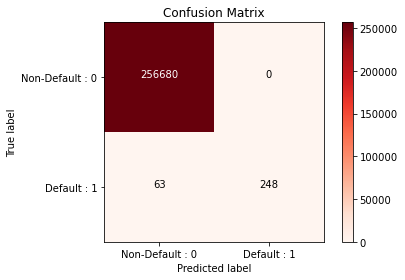

Classification report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    256680
           1       1.00      0.80      0.89       311

    accuracy                           1.00    256991
   macro avg       1.00      0.90      0.94    256991
weighted avg       1.00      1.00      1.00    256991

Accuracy of the model:  0.9997548552283932
AUC score: 0.903151383458428


In [111]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, ConfusionMatrixDisplay

cfm = confusion_matrix(Y_test, Y_pred)


Confusion_matrix_visualization(cfm, classes = ['Non-Default : 0', 'Default : 1'])
plt.show()


print("Classification report: ")
print(classification_report(Y_test, Y_pred))


acc = accuracy_score(Y_test, Y_pred)
print("Accuracy of the model: ", acc)

print('AUC score:',auc)

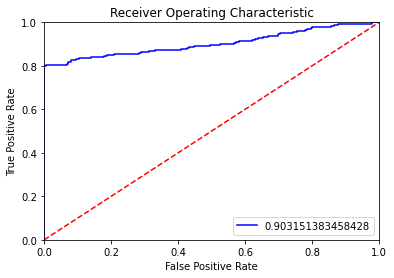

In [112]:
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.show()

# SVC

In [139]:
%%time
from sklearn.svm import SVC
svc_model=SVC()
svc_model.fit(X_train,Y_train)
Y_pred=svc_model.predict(X_test)


Wall time: 9min 37s


Confusion Matrix
[[256678      2]
 [    22    289]]


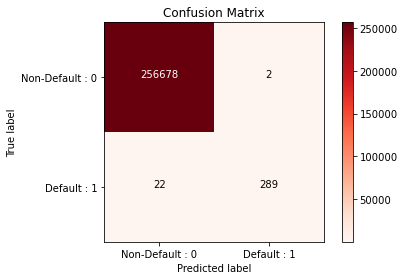

Classification report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    256680
           1       0.99      0.93      0.96       311

    accuracy                           1.00    256991
   macro avg       1.00      0.96      0.98    256991
weighted avg       1.00      1.00      1.00    256991

Accuracy of the model:  0.9999066115155784


In [141]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, ConfusionMatrixDisplay

cfm = confusion_matrix(Y_test, Y_pred)


Confusion_matrix_visualization(cfm, classes = ['Non-Default : 0', 'Default : 1'])
plt.show()


print("Classification report: ")
print(classification_report(Y_test, Y_pred))


acc = accuracy_score(Y_test, Y_pred)
print("Accuracy of the model: ", acc)



### Extreme Gradient Boosting (XGB)

In [113]:
%%time
from xgboost import XGBClassifier

model_XGB = XGBClassifier(random_state=10)

#fit the model on the data and predict the values
model_XGB.fit(X_train,Y_train)

Y_pred = model_XGB.predict(X_test)

Wall time: 26.5 s


In [114]:
%%time
Y_pred_prob = model_XGB.predict_proba(X_test)

Wall time: 246 ms


In [115]:
from sklearn import metrics

fpr, tpr, z = metrics.roc_curve(Y_test, Y_pred_prob[:, 1])
auc = metrics.auc(fpr, tpr)
print(auc)

0.9866765554919184


Confusion Matrix
[[256680      0]
 [    10    301]]


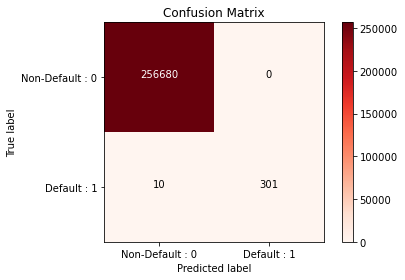

Classification report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    256680
           1       1.00      0.97      0.98       311

    accuracy                           1.00    256991
   macro avg       1.00      0.98      0.99    256991
weighted avg       1.00      1.00      1.00    256991

Accuracy of the model:  0.999961088131491
AUC score: 0.9866765554919184


In [116]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, ConfusionMatrixDisplay

cfm = confusion_matrix(Y_test, Y_pred)


Confusion_matrix_visualization(cfm, classes = ['Non-Default : 0', 'Default : 1'])
plt.show()


print("Classification report: ")
print(classification_report(Y_test, Y_pred))


acc = accuracy_score(Y_test, Y_pred)
print("Accuracy of the model: ", acc)

print('AUC score:',auc)

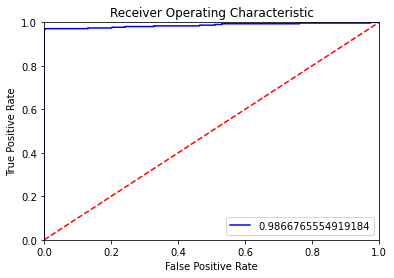

In [117]:
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.show()

###  HyperParameter using RandomisedsearchCV on XGB

In [95]:
%%time
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV
params = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5]
        }
xgb_rs = RandomizedSearchCV(XGBClassifier(random_state = 10), params, verbose = 1, cv = 3)
xgb_rs.fit(X_train, Y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:  6.8min finished


Wall time: 7min 13s


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, gamma=None,
                                           gpu_id=None, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           n...
                                           subsample=None, tree_method=None,
                                           validate_parameters=None,
                                  

In [96]:
xgb_rs.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1.0, gamma=0.5, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=10, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1.0,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [124]:
%%time
from xgboost import XGBClassifier

model_GradientBoosting = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1.0, gamma=0.5, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=5,
              min_child_weight=1, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=10, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1.0,
              tree_method='exact', validate_parameters=1, verbosity=None)

#fit the model on the data and predict the values
model_GradientBoosting.fit(X_train,Y_train)

Y_pred = model_GradientBoosting.predict(X_test)

Wall time: 42.1 s


Confusion Matrix
[[256680      0]
 [    10    301]]


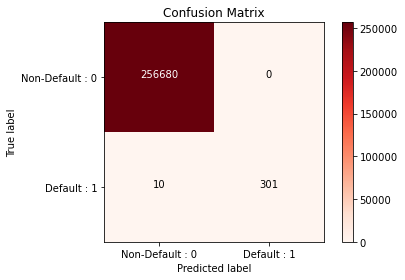

Classification report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    256680
           1       1.00      0.97      0.98       311

    accuracy                           1.00    256991
   macro avg       1.00      0.98      0.99    256991
weighted avg       1.00      1.00      1.00    256991

Accuracy of the model:  0.999961088131491


In [125]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, ConfusionMatrixDisplay

cfm = confusion_matrix(Y_test, Y_pred)


Confusion_matrix_visualization(cfm, classes = ['Non-Default : 0', 'Default : 1'])
plt.show()


print("Classification report: ")
print(classification_report(Y_test, Y_pred))


acc = accuracy_score(Y_test, Y_pred)
print("Accuracy of the model: ", acc)

### Decision Tree

In [126]:
%%time
#predicting using the Decision_Tree_Classifier
from sklearn.tree import DecisionTreeClassifier

model_DecisionTree = DecisionTreeClassifier()

#fit the model on the data and predict the values
model_DecisionTree.fit(X_train,Y_train)
Y_pred = model_DecisionTree.predict(X_test)

Wall time: 10.3 s


Confusion Matrix
[[256678      2]
 [    10    301]]


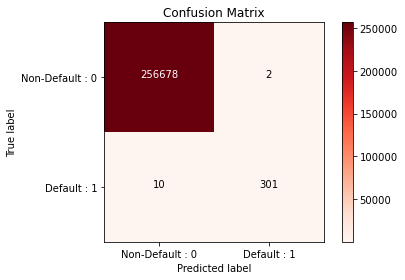

Classification report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    256680
           1       0.99      0.97      0.98       311

    accuracy                           1.00    256991
   macro avg       1.00      0.98      0.99    256991
weighted avg       1.00      1.00      1.00    256991

Accuracy of the model:  0.9999533057577892


In [127]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, ConfusionMatrixDisplay

cfm = confusion_matrix(Y_test, Y_pred)


Confusion_matrix_visualization(cfm, classes = ['Non-Default : 0', 'Default : 1'])
plt.show()


print("Classification report: ")
print(classification_report(Y_test, Y_pred))


acc = accuracy_score(Y_test, Y_pred)
print("Accuracy of the model: ", acc)

### HyperParameter using RandomisedsearchCV on Decision Tree

In [102]:
%%time
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV
params = {'criterion': ['gini','entropy'],
          'max_leaf_nodes': list(range(2, 100)),
          'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9, 10]}
random_search_cv_dt = RandomizedSearchCV(DecisionTreeClassifier(random_state = 10), params, verbose = 1, cv = 3)
random_search_cv_dt.fit(X_train, Y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:  1.2min finished


Wall time: 1min 18s


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features=None,
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    presort='deprecated',
                                                    random_state=10,
            

In [103]:
random_search_cv_dt.best_estimator_

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=44,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=10, splitter='best')

In [128]:
%%time
#predicting using the Decision_Tree_Classifier
from sklearn.tree import DecisionTreeClassifier

model_DecisionTree = DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=44,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=10, splitter='best')

#fit the model on the data and predict the values
model_DecisionTree.fit(X_train,Y_train)
Y_pred = model_DecisionTree.predict(X_test)

Wall time: 6.65 s


Confusion Matrix
[[256676      4]
 [    10    301]]


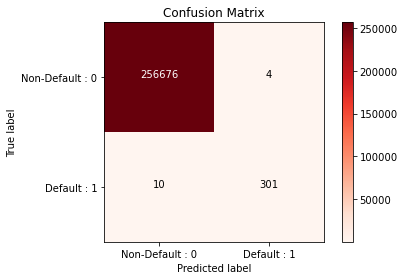

Classification report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    256680
           1       0.99      0.97      0.98       311

    accuracy                           1.00    256991
   macro avg       0.99      0.98      0.99    256991
weighted avg       1.00      1.00      1.00    256991

Accuracy of the model:  0.9999455233840874


In [129]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, ConfusionMatrixDisplay

cfm = confusion_matrix(Y_test, Y_pred)


Confusion_matrix_visualization(cfm, classes = ['Non-Default : 0', 'Default : 1'])
plt.show()


print("Classification report: ")
print(classification_report(Y_test, Y_pred))


acc = accuracy_score(Y_test, Y_pred)
print("Accuracy of the model: ", acc)

## Final Model

### XGB Classifier

In [130]:
to_predict = df1[['out_prncp', 'tot_cur_bal', 'collection_recovery_fee', 'last_pymnt_amnt', 'annual_inc',
                         'total_rec_prncp', 'total_rec_int', 'emp_title',
                         'loan_amnt','sub_grade','tot_coll_amt','revol_bal', 'last_pymnt_d','last_credit_pull_d']].values

In [131]:
from sklearn.preprocessing import StandardScaler

scalar = StandardScaler()
scalar.fit(to_predict)


to_predict = scalar.transform(to_predict)


#scaler object should never be fitted on the test data.
#fit() should be implemented only on the train data and the same scaler object should be used to transform both the train as well as test data.

### Prediction on the whole dataset

In [132]:
Y_pred_wholedata = model_XGB.predict(to_predict)

In [133]:
predictced = pd.DataFrame(Y_pred_wholedata)

In [134]:
predictced.columns = ['predictions']

In [135]:
pred_on_wholedata = pd.concat((df,predictced), axis = 1)

In [136]:
pred_on_wholedata.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,pymnt_plan,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,default_ind,predictions
0,1077501,1296599,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-2011,n,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-1985,1.0,3.0,0.0,13648.0,83.7,9.0,f,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,Jan-2015,171.62,NaN,Jan-2016,0.0,1.0,INDIVIDUAL,0.0,NaN,NaN,NaN,0,1
1,1077430,1314167,2500.0,2500.0,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-2011,n,car,bike,309xx,GA,1.00,0.0,Apr-1999,5.0,3.0,0.0,1687.0,9.4,4.0,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-2013,119.66,NaN,Sep-2013,0.0,1.0,INDIVIDUAL,0.0,NaN,NaN,NaN,1,0
2,1077175,1313524,2400.0,2400.0,2400.0,36 months,15.96,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-2011,n,small_business,real estate business,606xx,IL,8.72,0.0,Nov-2001,2.0,2.0,0.0,2956.0,98.5,10.0,f,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,Jun-2014,649.91,NaN,Jan-2016,0.0,1.0,INDIVIDUAL,0.0,NaN,NaN,NaN,0,1
3,1076863,1277178,10000.0,10000.0,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-2011,n,other,personel,917xx,CA,20.00,0.0,Feb-1996,1.0,10.0,0.0,5598.0,21.0,37.0,f,0.0,0.0,12226.302212,12226.30,10000.00,2209.33,16.97,0.00,0.00,Jan-2015,357.48,NaN,Jan-2015,0.0,1.0,INDIVIDUAL,0.0,NaN,NaN,NaN,0,1
4,1075358,1311748,3000.0,3000.0,3000.0,60 months,12.69,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-2011,n,other,Personal,972xx,OR,17.94,0.0,Jan-1996,0.0,15.0,0.0,27783.0,53.9,38.0,f,766.9,766.9,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.00,Jan-2016,67.79,Feb-2016,Jan-2016,0.0,1.0,INDIVIDUAL,0.0,NaN,NaN,NaN,0,1


### Saving the predicted file on the machine directory

In [99]:
pred_on_wholedata.to_csv(r'C:\Python Imarticus\Capstone Projects\Python\prediction_wholeData.csv')

### Conclusion: 

Scrutinizing the statistics from the above models, the XYZ Coproration can conclude that they should go with the XGB Classifier model.

As XGB Model gives less Type 1 and Type 2 error and high Accuracy comparing to other models.

Hence, XYZ Corporation can use the XGB Classifier to classify the defaulters in the future!